# Droplet spreading over a flat surface against static contact angle $\theta_e$ -         Mesh convergence study
![Droplet_Spreading domain configuration](DropletSpreading.png)

For this case study, we have considered a droplet spreading on a flat surface ([dupont2010numerical](https://doi.org/10.1016/j.jcp.2009.07.034)) that allows for studying the effect of the static contact angle boundary condition and the Bond number, $Bo = \frac{\rho_l g R_0}{\sigma}$ on the equilibrium shape of the droplet. Ideally, for a droplet that spreads with $Bo\ll1$, surface tension forces dominate, and the droplet at equilibrium maintains a spherical cap shape and satisfies the contact angle boundary condition. On the other hand, for $Bo\gg1$, the gravitational forces dominate, and the droplet forms a puddle, whose height is directly proportional to the capillary length, $l_{Ca}=\sqrt{\frac{\sigma}{\rho_l g}}$. The conservation of the droplet’s volume $V$ with an equilibrium contact angle $\theta_e$ allows formulating the geometrical relations that define the equilibrium shape of the droplet ([dupont2010numerical](https://doi.org/10.1016/j.jcp.2009.07.034), [fricke2020geometry](https://arxiv.org/abs/2003.04914)). In addition to observing droplets at equilibrium, we have also studied the mesh convergence of the spreading droplets.

This notebook shows the mesh convergence of water_glycerol and water droplets against $\theta_e$.
#### Note: water_glycerol and water are labelled as 'wg' and 'w' respectively.

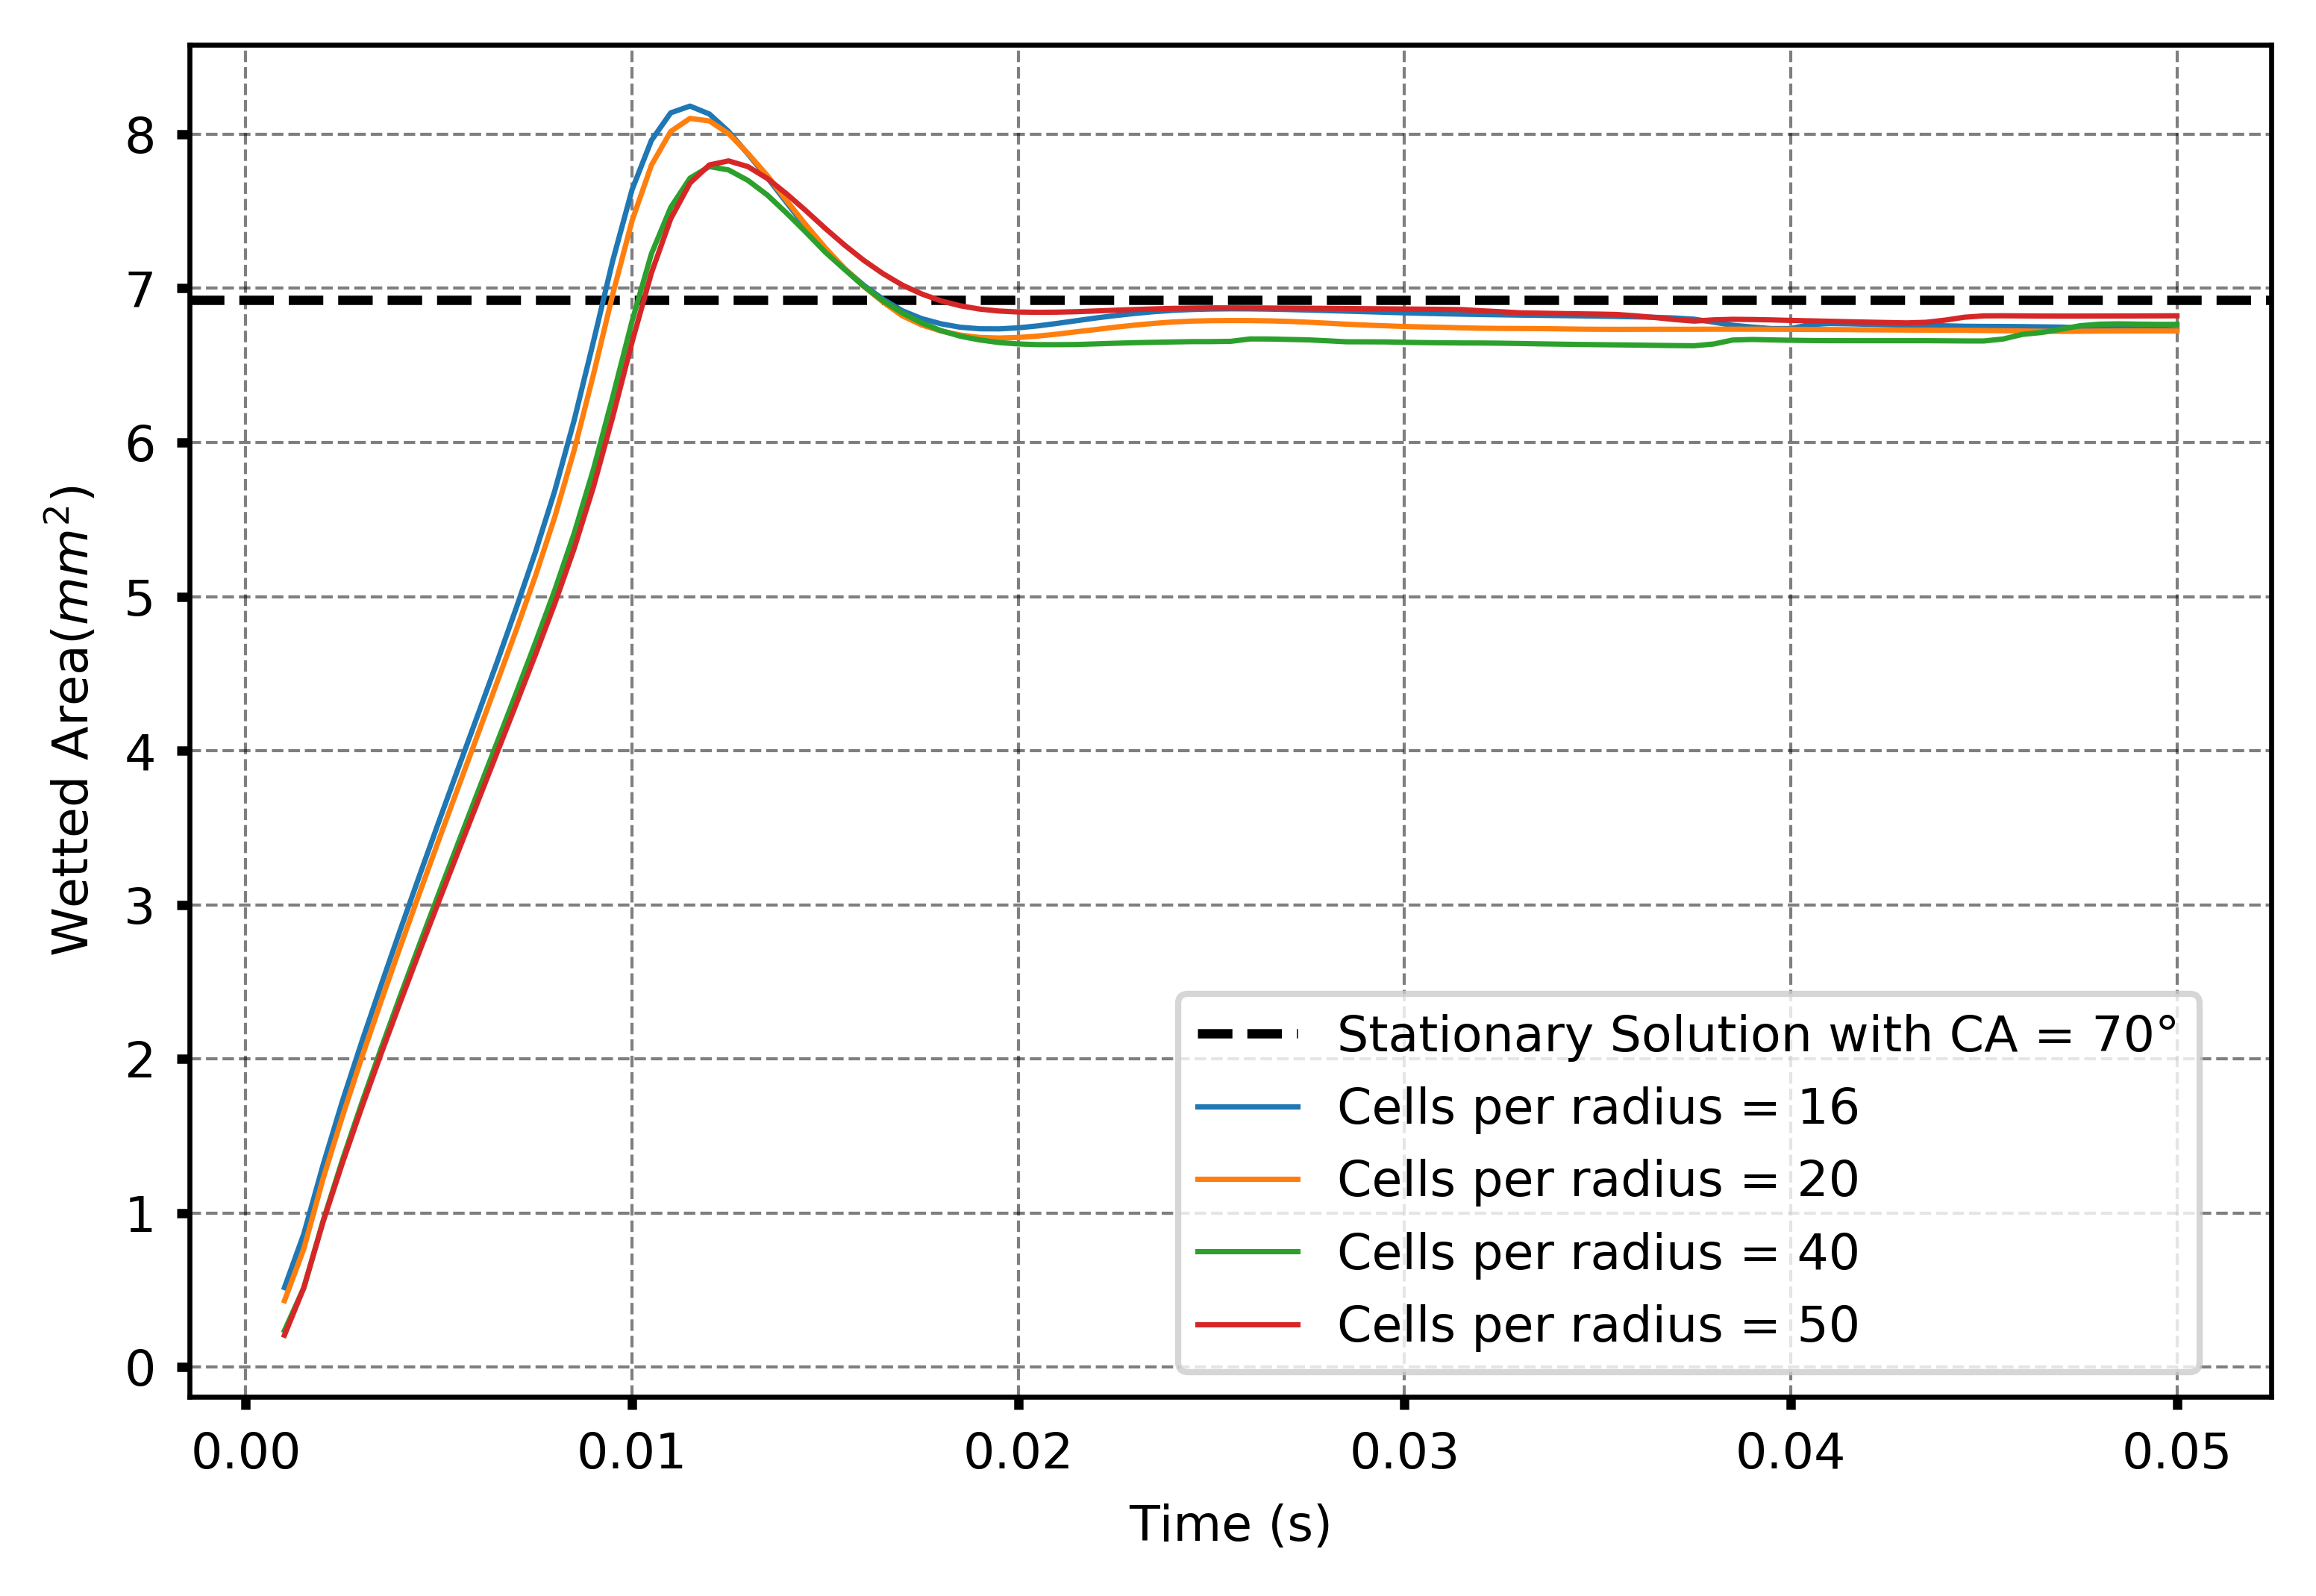

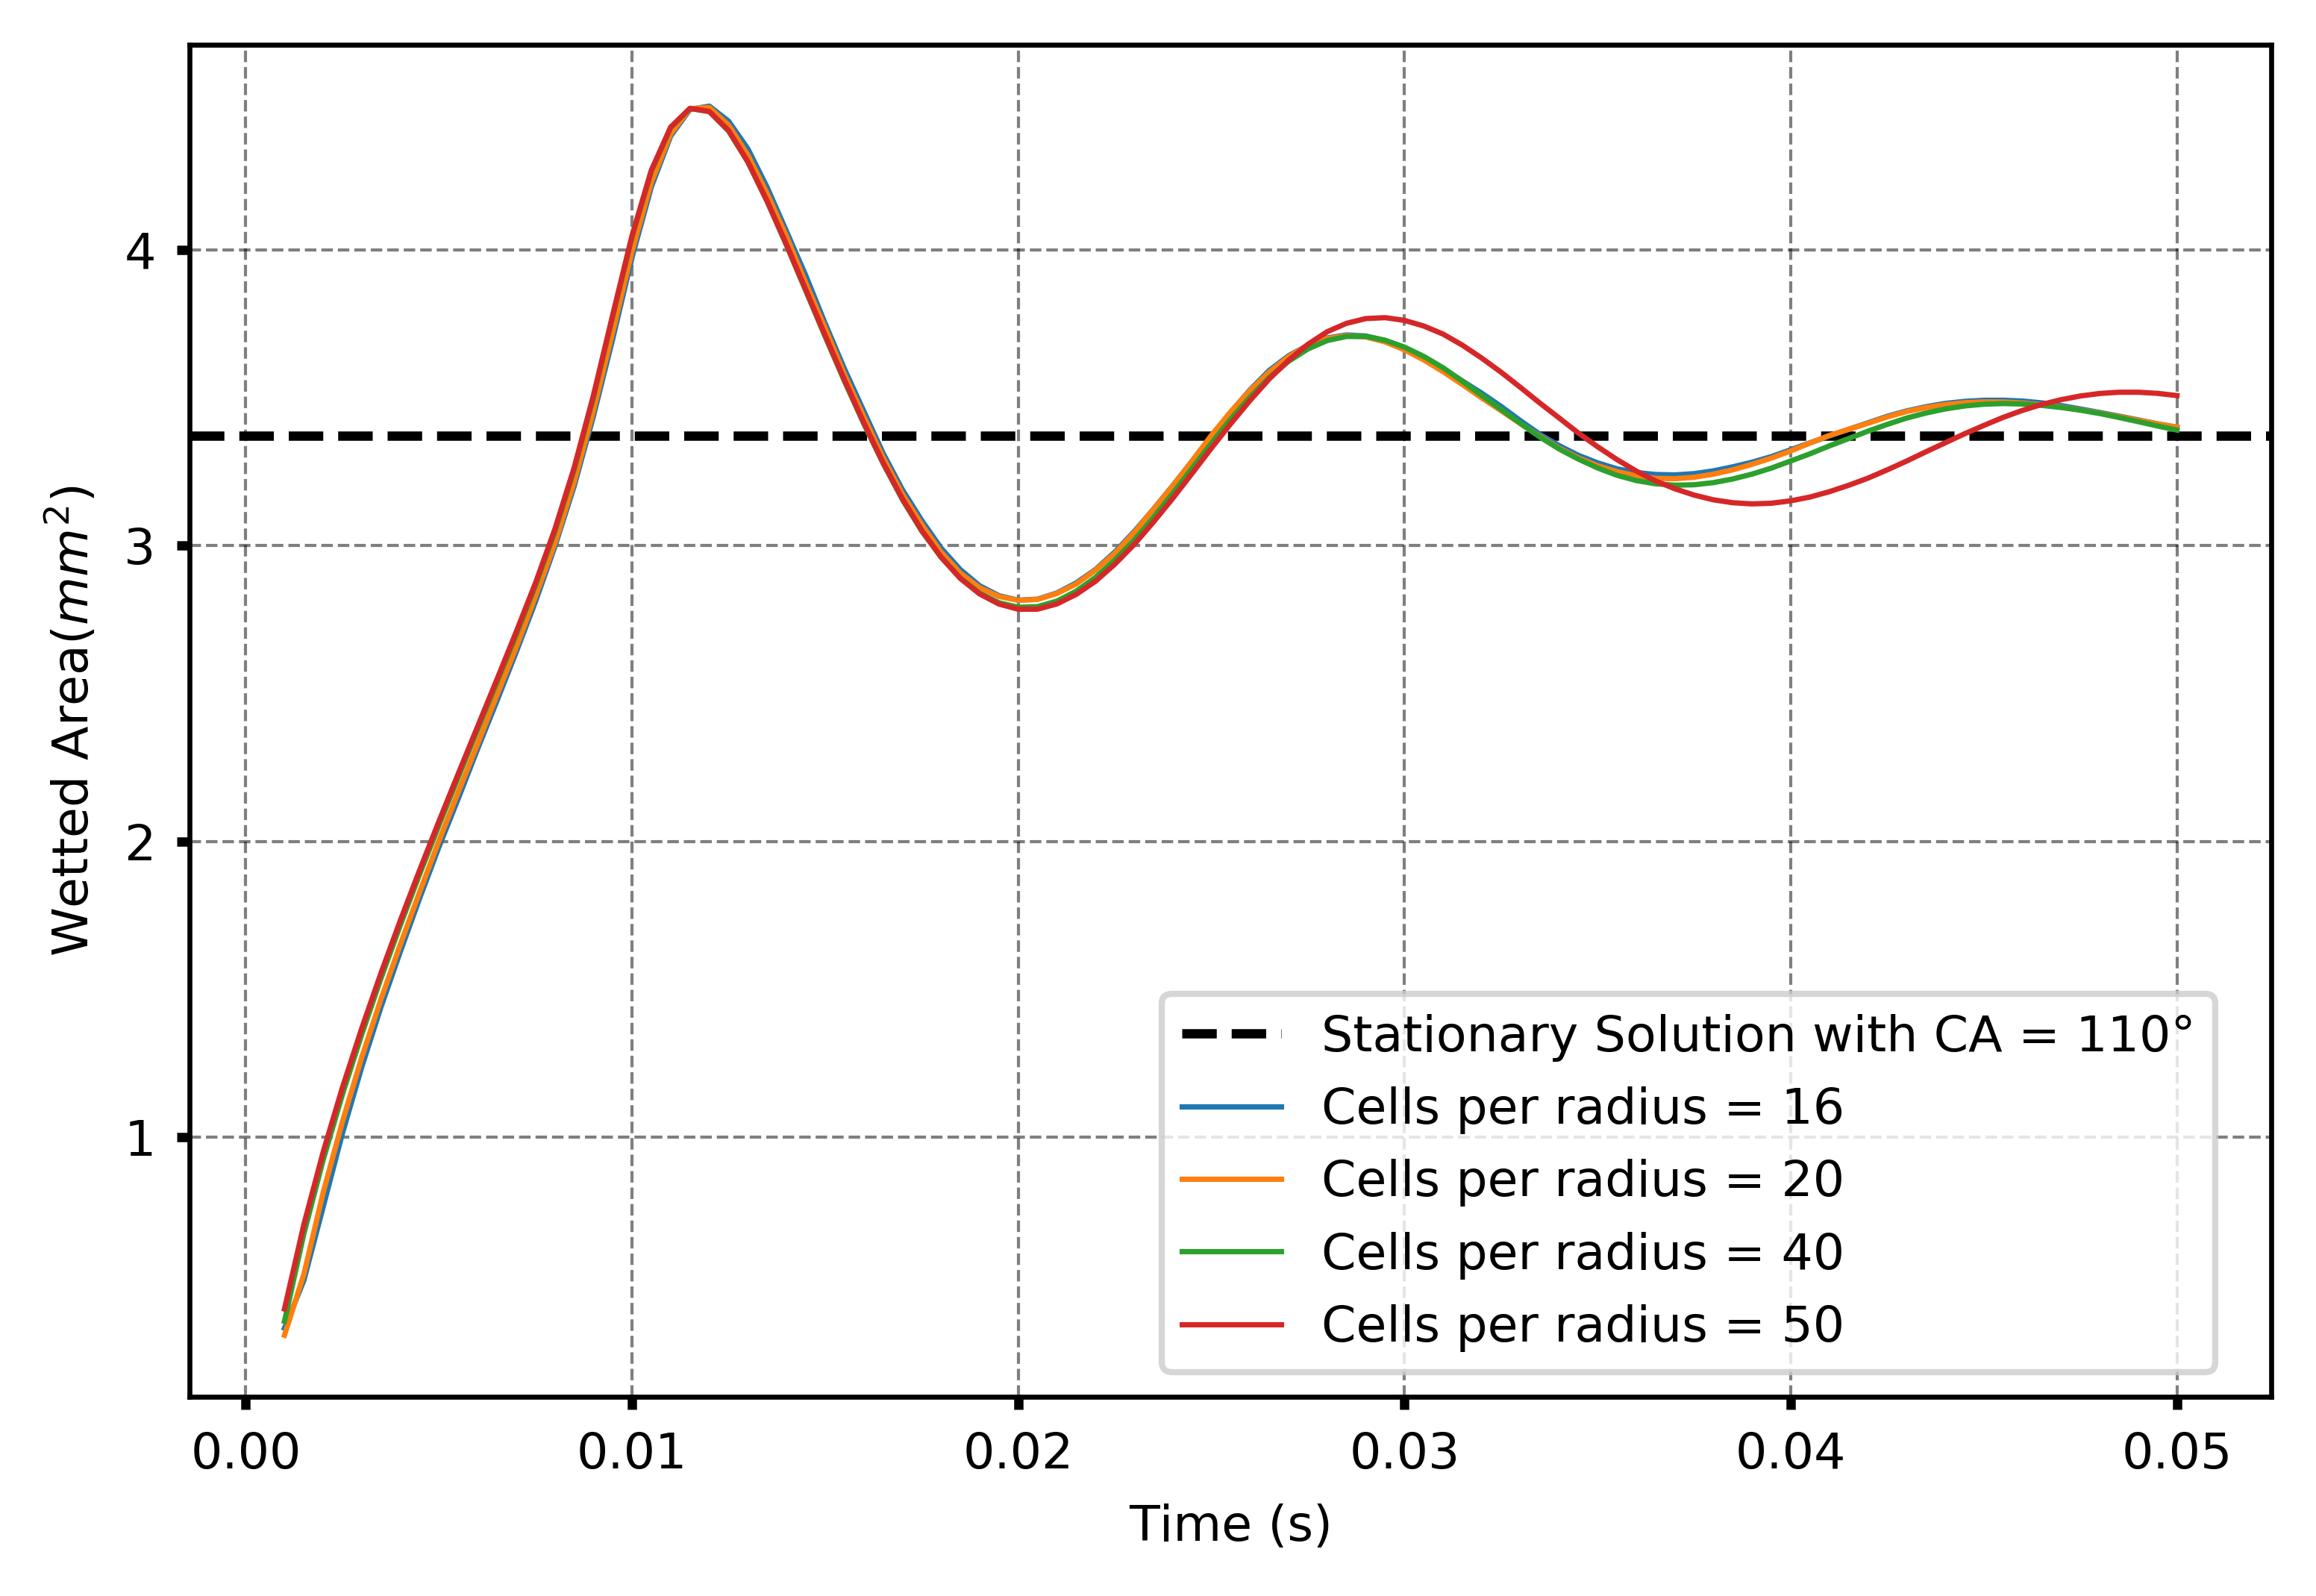

In [1]:
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
import sys
# for radians
import math
import os
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParams

# Append the path to the modules directory
sys.path.append(os.path.join(os.getcwd(), '../../modules'))
# Import the required functions from the "flat_spreading_funcs" module
from flat_spreading_funcs import Funcs

# Set constant values
pi = np.pi
sin = np.sin
cos = np.cos
surfaceTensionModel = 'fitParaboloid' # Surface tension model
dataFolder = '/postProcessing/' # Folder with .csv files
fluid = 'water_glycerol'
fluidLabel = 'wgtest' # Used in naming convention for the parameter files
contactAngles= [70,110] # List of contact angles

for i, angle in enumerate (contactAngles): 
    contactAngle = contactAngles[i]
    theta = np.radians(contactAngle)
    pattern = fluidLabel + str(contactAngle) + '_'
    dropletRadius = 0.001 # 1mm
    domainLength = 0.005

   # Get the variation map from PyFoam
    var_Map = Funcs.fileMapping(pattern, surfaceTensionModel)

    # Create lists for each variation parameter
    nX = []
    stm = []
    var_list = []
    for key, value in var_Map.items():
        # Get the surface tension model
        stm_map = str(value).split(', ')[0][:-1]
        stm.append(stm_map.split(': ')[1][1:])
        # Get the no. of cells in x-directions
        nX_map = str(value).split(', ')[3][:-1] 
        nX.append(int(nX_map.split(': ')[1][0:]))
        # variation list
        var_list.append(str(key))

    cellsPerRadius = [int(nx / domainLength * dropletRadius) for nx in nX]
    wettedAreaFileNames = Funcs.fileStructure(dataFolder, 'wettedArea.csv', pattern, var_list)
    plotLabels = ['Cells per radius = ' + str(x) for x in cellsPerRadius]

    # Plotting
    rcParams["figure.dpi"] = 600
    fontSize = 8
    plt.axhline(Funcs.getAnalyticalWettedArea(theta, dropletRadius), color='black', ls='dashed', linewidth=1.5, label = "Stationary Solution with CA = " + str(contactAngle) + "°")

    for idx, wettedAreaFile in enumerate(wettedAreaFileNames):
        df = pd.read_csv(wettedAreaFile, index_col = 0)
        plt.plot(df, label=plotLabels[idx], linewidth=0.85)
        plt.grid(b=True, which='major', linestyle='dashed', color='black', alpha=0.5, lw=0.5)
        plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
        plt.xlabel("Time (s)", color='black', fontsize=fontSize)
        plt.ylabel(r"Wetted Area($mm^2$)",color='black',fontsize=fontSize)
        plt.xticks(color='black',size = fontSize)
        plt.yticks(color='black',size = fontSize)
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    ### Generate the plot
    plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.72, 0), ncol=1)   
    plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'-'+str(surfaceTensionModel)+'.pdf', bbox_inches='tight')
    plt.savefig('mesh-convergence-study-'+str(fluid)+'_'+str(contactAngle)+'-'+str(surfaceTensionModel)+'.png', bbox_inches='tight')
    plt.show()
